In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import file and create dataframe

df = pd.read_csv("../data/raw/colorectal_cancer_dataset.csv")

In [4]:
# lets check the head of the dataframe
df.head()

,Patient_ID,Country,Age,Gender,Cancer_Stage,Tumor_Size_mm,Family_History,Smoking_History,Alcohol_Consumption,Obesity_BMI,...,Survival_5_years,Mortality,Healthcare_Costs,Incidence_Rate_per_100K,Mortality_Rate_per_100K,Urban_or_Rural,Economic_Classification,Healthcare_Access,Insurance_Status,Survival_Prediction
0,1,UK,77,M,Localized,69,No,No,Yes,Overweight,...,Yes,No,54413,50,5,Urban,Developed,Moderate,Insured,Yes
1,2,UK,59,M,Localized,33,No,No,No,Overweight,...,Yes,No,76553,37,25,Urban,Developing,High,Uninsured,Yes
2,3,Japan,66,M,Regional,17,No,Yes,No,Normal,...,Yes,No,62805,54,27,Urban,Developed,Moderate,Uninsured,No
3,4,USA,83,M,Regional,14,No,No,No,Obese,...,Yes,No,89393,45,11,Urban,Developed,Moderate,Insured,Yes
4,5,France,66,M,Localized,34,No,Yes,No,Normal,...,Yes,No,66425,15,27,Urban,Developing,High,Insured,Yes


In [5]:
# check null values in any of the features

df.isnull().sum()

Patient_ID                    0
Country                       0
Age                           0
Gender                        0
Cancer_Stage                  0
Tumor_Size_mm                 0
Family_History                0
Smoking_History               0
Alcohol_Consumption           0
Obesity_BMI                   0
Diet_Risk                     0
Physical_Activity             0
Diabetes                      0
Inflammatory_Bowel_Disease    0
Genetic_Mutation              0
Screening_History             0
Early_Detection               0
Treatment_Type                0
Survival_5_years              0
Mortality                     0
Healthcare_Costs              0
Incidence_Rate_per_100K       0
Mortality_Rate_per_100K       0
Urban_or_Rural                0
Economic_Classification       0
Healthcare_Access             0
Insurance_Status              0
Survival_Prediction           0
dtype: int64

In [19]:
# there is no null values so data is probably cleaned.
# lets check the shape and duplicate rows

df.shape, df.duplicated().sum()


((167497, 28), np.int64(0))

In [20]:
#let get info of the data types and columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167497 entries, 0 to 167496
Data columns (total 28 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   Patient_ID                  167497 non-null  int64 
 1   Country                     167497 non-null  object
 2   Age                         167497 non-null  int64 
 3   Gender                      167497 non-null  object
 4   Cancer_Stage                167497 non-null  object
 5   Tumor_Size_mm               167497 non-null  int64 
 6   Family_History              167497 non-null  object
 7   Smoking_History             167497 non-null  object
 8   Alcohol_Consumption         167497 non-null  object
 9   Obesity_BMI                 167497 non-null  object
 10  Diet_Risk                   167497 non-null  object
 11  Physical_Activity           167497 non-null  object
 12  Diabetes                    167497 non-null  object
 13  Inflammatory_Bowel_Disease  1

In [21]:
# check the description of the data
df.describe()   

,Patient_ID,Age,Tumor_Size_mm,Healthcare_Costs,Incidence_Rate_per_100K,Mortality_Rate_per_100K
count,167497.000000,167497.00000,167497.000000,167497.000000,167497.000000,167497.000000
mean,83749.000000,69.20078,42.005708,72452.168099,34.531562,17.023875
std,48352.363357,11.87247,21.672206,27402.779597,14.447970,7.208766
min,1.000000,30.00000,5.000000,25000.000000,10.000000,5.000000
25%,41875.000000,59.00000,23.000000,48760.000000,22.000000,11.000000
50%,83749.000000,69.00000,42.000000,72344.000000,35.000000,17.000000
75%,125623.000000,79.00000,61.000000,96227.000000,47.000000,23.000000
max,167497.000000,89.00000,79.000000,119999.000000,59.000000,29.000000


In [23]:
# check the description of the non-numeric data
df.describe(include='object').T

,count,unique,top,freq
Country,167497,16,USA,25927
Gender,167497,2,M,100686
Cancer_Stage,167497,3,Regional,66981
Family_History,167497,2,No,117184
Smoking_History,167497,2,No,100141
Alcohol_Consumption,167497,2,Yes,83857
Obesity_BMI,167497,3,Overweight,67168
Diet_Risk,167497,3,Moderate,83871
Physical_Activity,167497,3,Moderate,67022
Diabetes,167497,2,No,133941


In [25]:
# check unique values in the Gender column
df['Gender'].unique()

array(['M', 'F'], dtype=object)

In [26]:
#check unique values in the all columns
for col in df.columns:
    print(f"{col}: {df[col].unique()}")

Patient_ID: [     1      2      3 ... 167495 167496 167497]
Country: ['UK' 'Japan' 'USA' 'France' 'Canada' 'Germany' 'China' 'South Korea'
 'Brazil' 'Italy' 'India' 'Pakistan' 'New Zealand' 'South Africa'
 'Australia' 'Nigeria']
Age: [77 59 66 83 69 79 89 50 54 53 86 75 72 73 56 65 63 78 58 67 60 84 68 76
 70 85 62 61 55 74 81 88 80 64 71 87 52 82 41 51 57 46 30 49 45 37 35 36
 38 43 33 40 39 47 31 32 48 42 34 44]
Gender: ['M' 'F']
Cancer_Stage: ['Localized' 'Regional' 'Metastatic']
Tumor_Size_mm: [69 33 17 14 34 71 59 19 48 42 43 31 39 35 44 24 41 65 12 72 56 23 62 78
 64 57 68 15 52  8  5 58 70 13  6 11 16 10 63 50 77 47 61 32 28 27 75 25
 37 76 53 30 49 73 20 79 46 51 55 29 66 67 22 26 36  7 45 38  9 18 54 60
 74 40 21]
Family_History: ['No' 'Yes']
Smoking_History: ['No' 'Yes']
Alcohol_Consumption: ['Yes' 'No']
Obesity_BMI: ['Overweight' 'Normal' 'Obese']
Diet_Risk: ['Low' 'Moderate' 'High']
Physical_Activity: ['Low' 'Moderate' 'High']
Diabetes: ['No' 'Yes']
Inflammatory_Bowel_Disea

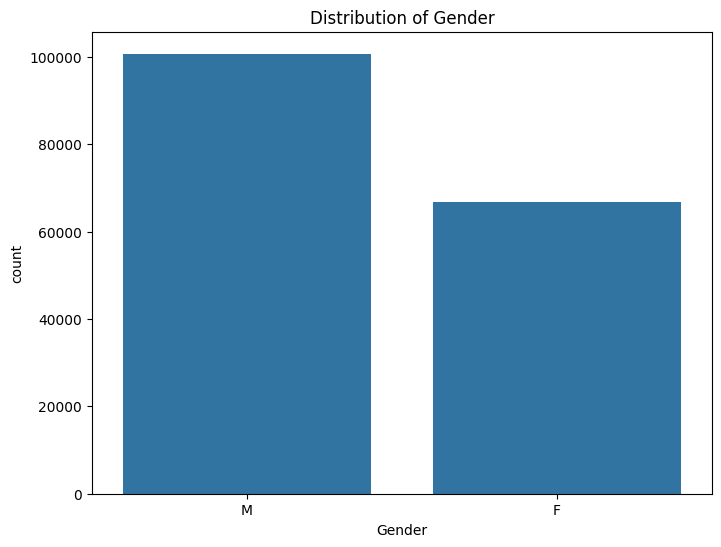

In [28]:
#Barplots how gender is destributed in the dataset

plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', data=df)
plt.title('Distribution of Gender')
plt.show()

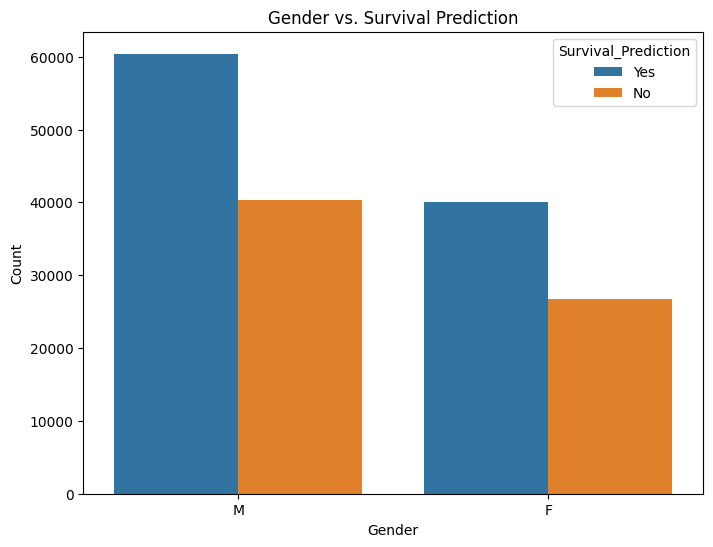

In [29]:
# barplot of gender vs survival prediction
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', hue='Survival_Prediction', data=df)
plt.title('Gender vs. Survival Prediction')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

C:\Users\sanja\AppData\Local\Temp\ipykernel_23648\114118283.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Country', data=df, palette='viridis')


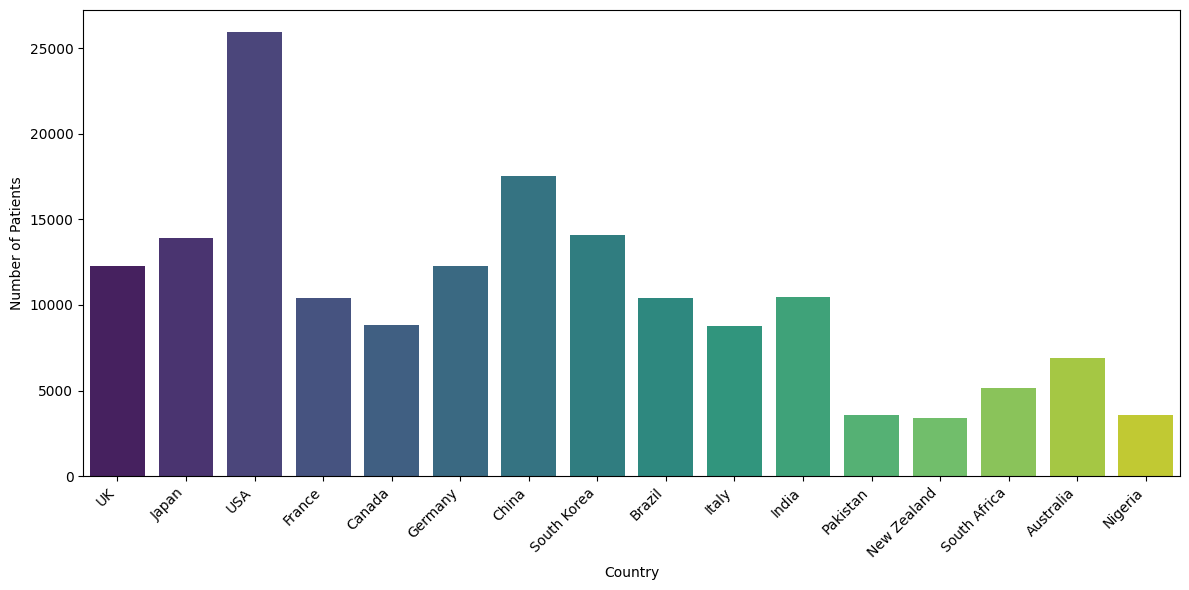

In [31]:
# distribution of data across different Countries

plt.figure(figsize=(12, 6)) 
sns.countplot(x='Country', data=df, palette='viridis') 
plt.xlabel('Country')
plt.ylabel('Number of Patients')
plt.xticks(rotation=45, ha='right') 
plt.tight_layout() 
plt.show()

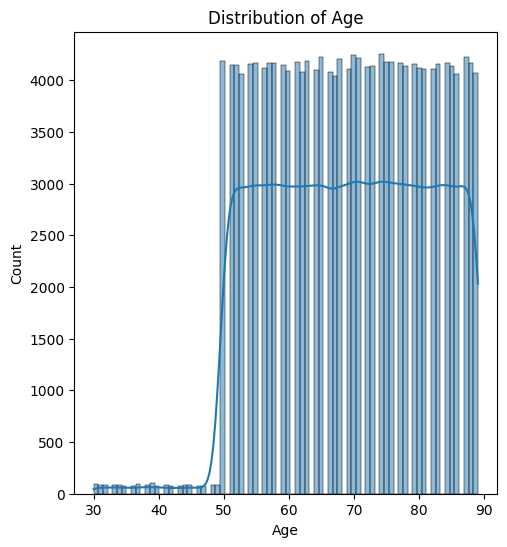

In [32]:
# Distribution of Age in the dataset
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['Age'], kde=True)
plt.title('Distribution of Age')
plt.show()

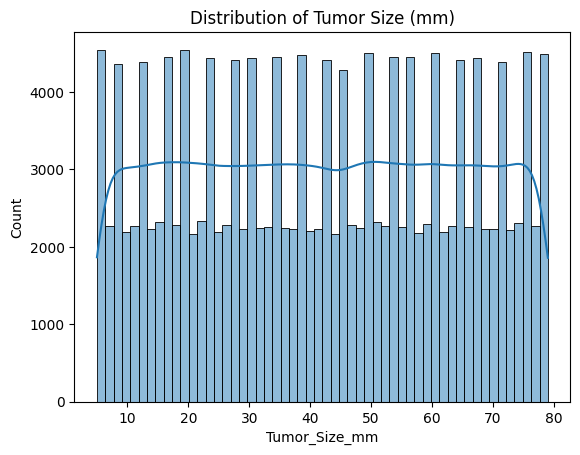

In [34]:
#distribution of tumor size in the dataset

sns.histplot(df['Tumor_Size_mm'], kde=True)
plt.title('Distribution of Tumor Size (mm)')
plt.show()

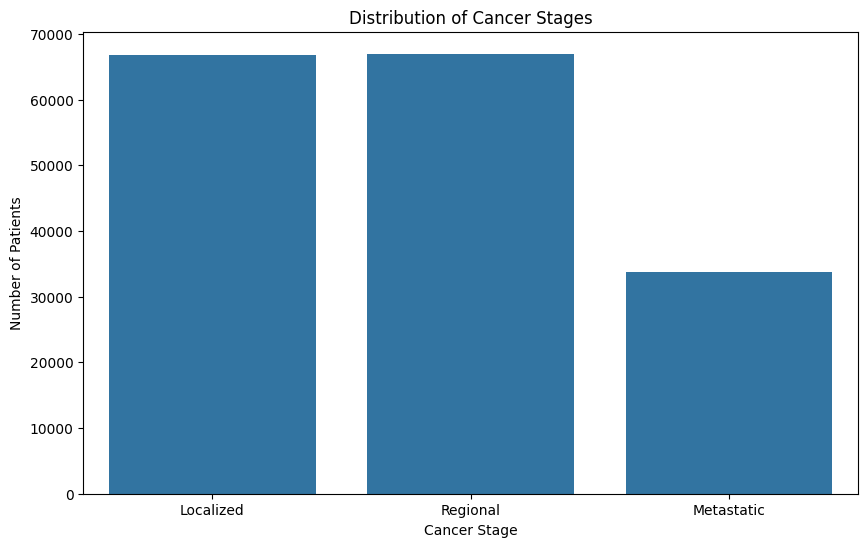

In [35]:
# distribution of cancer stages

plt.figure(figsize=(10, 6))
sns.countplot(x='Cancer_Stage', data=df) 
plt.title('Distribution of Cancer Stages')
plt.xlabel('Cancer Stage')
plt.ylabel('Number of Patients')
plt.show()

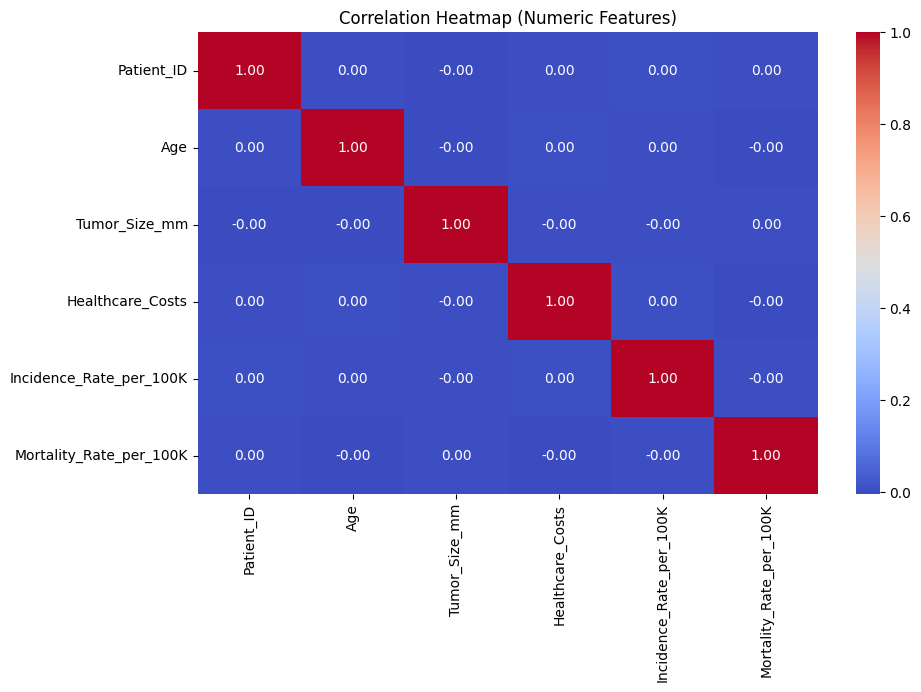

In [38]:

numeric_cols = df.select_dtypes(include=['number']).columns
plt.figure(figsize=(10, 6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap (Numeric Features)')
plt.show()